<a href="https://colab.research.google.com/github/dianadg159/Programacion_en_Python/blob/master/Proyecto_clasificacion_hongos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto: Clasificación de Hongos

Integrantes: Diana Delgado Gutiérrez y Natalia Gutiérrez Ponce

In [ ]:
# Origen y descripción de conjunto de datos:
# https://www.kaggle.com/datasets/uciml/mushroom-classification

In [ ]:
# Importar librerías
import pandas as pd
# Importar SVM, en scikit-learn se llama Support Vector Classifier (SVC)
from sklearn.svm import SVC
# Importar objeto para k-fold cross-validation con búsqueda aleatoria de hyperparámetros
from sklearn.model_selection import RandomizedSearchCV
# Importar objeto para separación de datos en conjuntos de entrenamiento y evaluación
from sklearn.model_selection import train_test_split
# Obtener valore de una distribución uniforme
from scipy.stats import uniform, expon
# Importar objeto para escalamiento de datos
from sklearn.preprocessing import StandardScaler, LabelBinarizer
# Importar metricas de evaluación
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
# Importar objeto para imprimir matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# Importar objeto para imprimir reporte de clasificación 
from sklearn.metrics import classification_report
# Plots
import matplotlib.pyplot as plt
# Import object to plot Precision-Recall curve
from sklearn.metrics import PrecisionRecallDisplay
# Importar libreria para el Decision Tree Model
from sklearn import tree
# Importar objeto para randomize search
from sklearn.model_selection import RandomizedSearchCV
# Imporatar objeto para label encoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# Importar numpy
import numpy as np

In [ ]:
# Leer datos en dataframe
data = pd.read_csv("mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
# Verificar categorías de clase
data['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
# Verificar dimensionalidad de datos
data.shape

(8124, 23)

In [ ]:
# Verificar ejemplos por categoría
print(data.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [ ]:
# Utilizamos LabelEncoder para cambiar los datos de letras a numeros
# Mantener la misma estructura de data.frame
labelencoder = LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

# Preparar datos
# X = sólo datos de características de ejemplos
# y = categorías de clase para cada ejemplo
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
print("Datos")
print(X.head())
print("\nCategorias de clase")
print(y.head())

Datos
   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2               

In [ ]:
# En este caso no se considero necesario hacer un escalamiento de datos, pues //
# no hay una diferencia de magnitud significativa entre ellos

In [ ]:
# Separación de datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**SVM MODEL**

In [ ]:
# SVM
svm_model= SVC()

# Definimos los paramtros del modelo SVM
search_parameters = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

In [ ]:
# Definimos el classifier
clf = RandomizedSearchCV(svm_model, search_parameters, random_state=0, cv=5, 
                                    scoring='f1_weighted', verbose=2, n_jobs=-1)
classifier = clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Verificamos resultados de entrenamiento y cross-validation
print("Mejor F-1 weighted score")
print(classifier.best_score_)
print("Mejores hyperparámetros")
print(classifier.best_params_)

Mejor F-1 weighted score
1.0
Mejores hyperparámetros
{'C': 195.1545320209259, 'class_weight': None, 'gamma': 0.05510484910954993, 'kernel': 'rbf'}


In [ ]:
# Evaluación
y_pred= classifier.predict(X_test)
print("Resultados de evaluación")
print("F-1 weighted: {}".format(f1_score(y_test, y_pred, average='weighted')))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(f1_score(y_test, y_pred)))
print("AUROC: {}".format(roc_auc_score(y_test, y_pred, average='weighted')))

Resultados de evaluación
F-1 weighted: 1.0
Precision: 1.0
Recall: 1.0
AUROC: 1.0


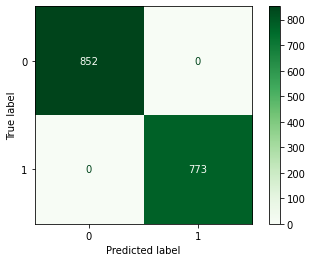

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                             display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
# Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 0, 'False Positive Rate')

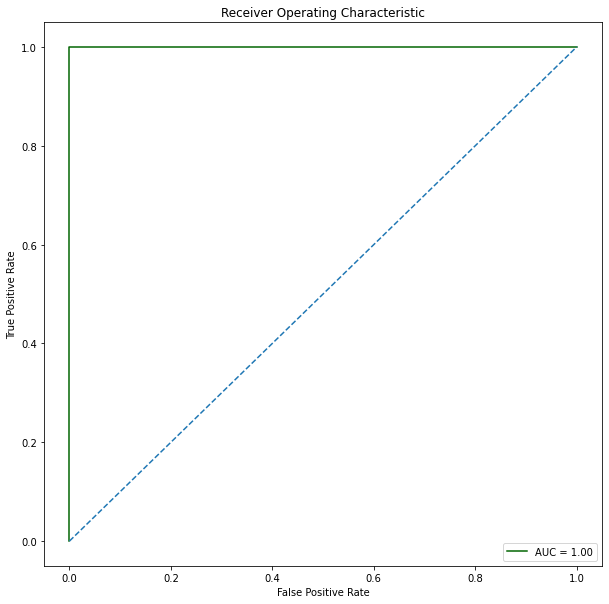

In [ ]:
# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred, average='weighted')
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='darkgreen',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

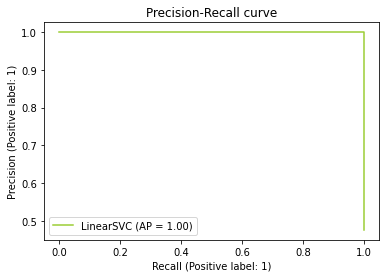

In [ ]:
# Importar libreria
from sklearn.metrics import PrecisionRecallDisplay

# Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name = 'LinearSVC', color = 'yellowgreen')
PR_curve = display.ax_.set_title('Precision-Recall curve')

**DECISION TREE MODEL**

In [ ]:
decision_tree_model = tree.DecisionTreeClassifier()

# Seleccionamos los parametros para nuestro decision tree classifier
search_parameters = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 4, 6, 8, 10, None],
                     'min_samples_split': [2, 4, 6, 8, 10, 12, 14]}

In [ ]:
# Definimos el classifier
clf = RandomizedSearchCV(decision_tree_model, search_parameters, random_state=0, cv=5, 
                                    scoring='f1_weighted', verbose=2, n_jobs=-1)
classifier = clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Verificamos resultados de entrenamiento y cross-validation
print("Mejor F-1 weighted score")
print(classifier.best_score_)
print("Mejores hyperparámetros")
print(classifier.best_params_)

Mejor F-1 weighted score
1.0
Mejores hyperparámetros
{'min_samples_split': 4, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# Evaluación
y_pred = classifier.predict(X_test)
print("Resultados de evaluación")
print("F-1 weighted: {}".format(f1_score(y_test, y_pred, average='weighted')))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(f1_score(y_test, y_pred)))
print("AUROC: {}".format(roc_auc_score(y_test, y_pred, average='weighted')))

Resultados de evaluación
F-1 weighted: 1.0
Precision: 1.0
Recall: 1.0
AUROC: 1.0


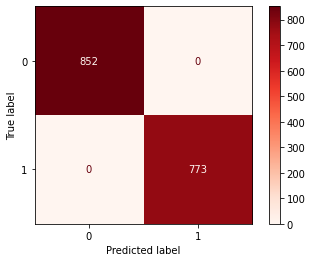

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test,y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                             display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.show()


In [ ]:
# Reporte de clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 0, 'False Positive Rate')

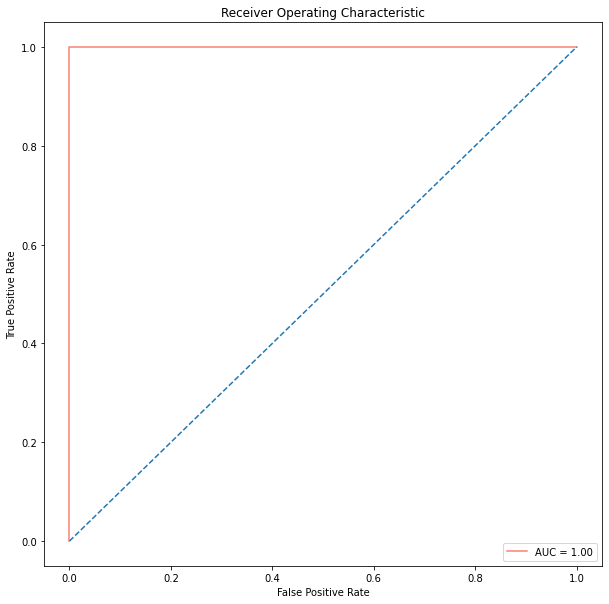

In [ ]:
# Plot ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred, average='weighted')
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='salmon',label = 'AUC = %0.2f' % auc_roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

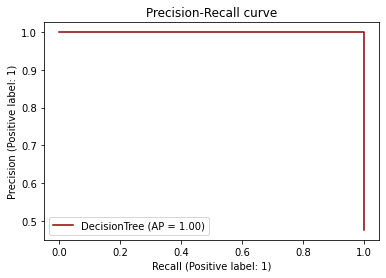

In [ ]:
# Importamos librerias
from sklearn.metrics import PrecisionRecallDisplay

# Precision-Recall curve
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="DecisionTree", color = "darkred")
PR_curve = display.ax_.set_title("Precision-Recall curve")


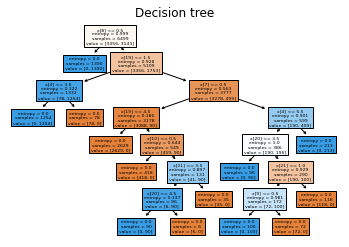

In [ ]:
# Grafica del arbol de decisiones

# Seleccionamos el mejor arbol
best_classifier = classifier.best_estimator_
plt.figure() 
tree.plot_tree(best_classifier, filled=True) 
plt.title("Decision tree") 
plt.show()